In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:/Users/Hanieh/Desktop/autism-prediction/Autism-prediction/train.csv")
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [3]:
test=pd.read_csv("C:/Users/Hanieh/Desktop/autism-prediction/Autism-prediction/test.csv")
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [4]:
print(train.shape)
print(test.shape)

(800, 22)
(200, 21)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
ID=test["ID"]

In [7]:
train=train.drop(["ID","age_desc","used_app_before"],axis=1)
test=test.drop(["ID","age_desc","used_app_before"],axis=1)

In [8]:
#train["age"]=train["age"].astype(int)
#test["age"]=test["age"].astype(int)

In [9]:
train=train.replace("?",np.nan)
test=test.replace("?",np.nan)

In [10]:
train.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity        151
jaundice           0
austim             0
contry_of_res      0
result             0
relation          77
Class/ASD          0
dtype: int64

In [11]:
test.isnull().sum()

A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
age               0
gender            0
ethnicity        37
jaundice          0
austim            0
contry_of_res     0
result            0
relation         14
dtype: int64

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000
A10_Score,800.0,0.460000,0.498709,0.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
cat_col=[]
for i in train.columns:
    if train[i].dtype=="object":
        cat_col.append(i)
print("categorical columns:",cat_col)

categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'relation']


In [14]:
num_col=[]
for i in train.columns:
    if train[i].dtype!="object":
        num_col.append(i)
print("numerical columns:", num_col)

numerical columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']


In [15]:
result=[]

for i in train.columns:
    uni=train[i].unique()
    result.append([i,uni,len(uni)])
pd.DataFrame(result,columns=["column","unique values","count of the unique values"])

,column,unique values,count of the unique values
0,A1_Score,"[1, 0]",2
1,A2_Score,"[0, 1]",2
2,A3_Score,"[1, 0]",2
3,A4_Score,"[1, 0]",2
4,A5_Score,"[1, 0]",2
5,A6_Score,"[1, 0]",2
6,A7_Score,"[0, 1]",2
7,A8_Score,"[1, 0]",2
8,A9_Score,"[1, 0]",2
9,A10_Score,"[1, 0]",2


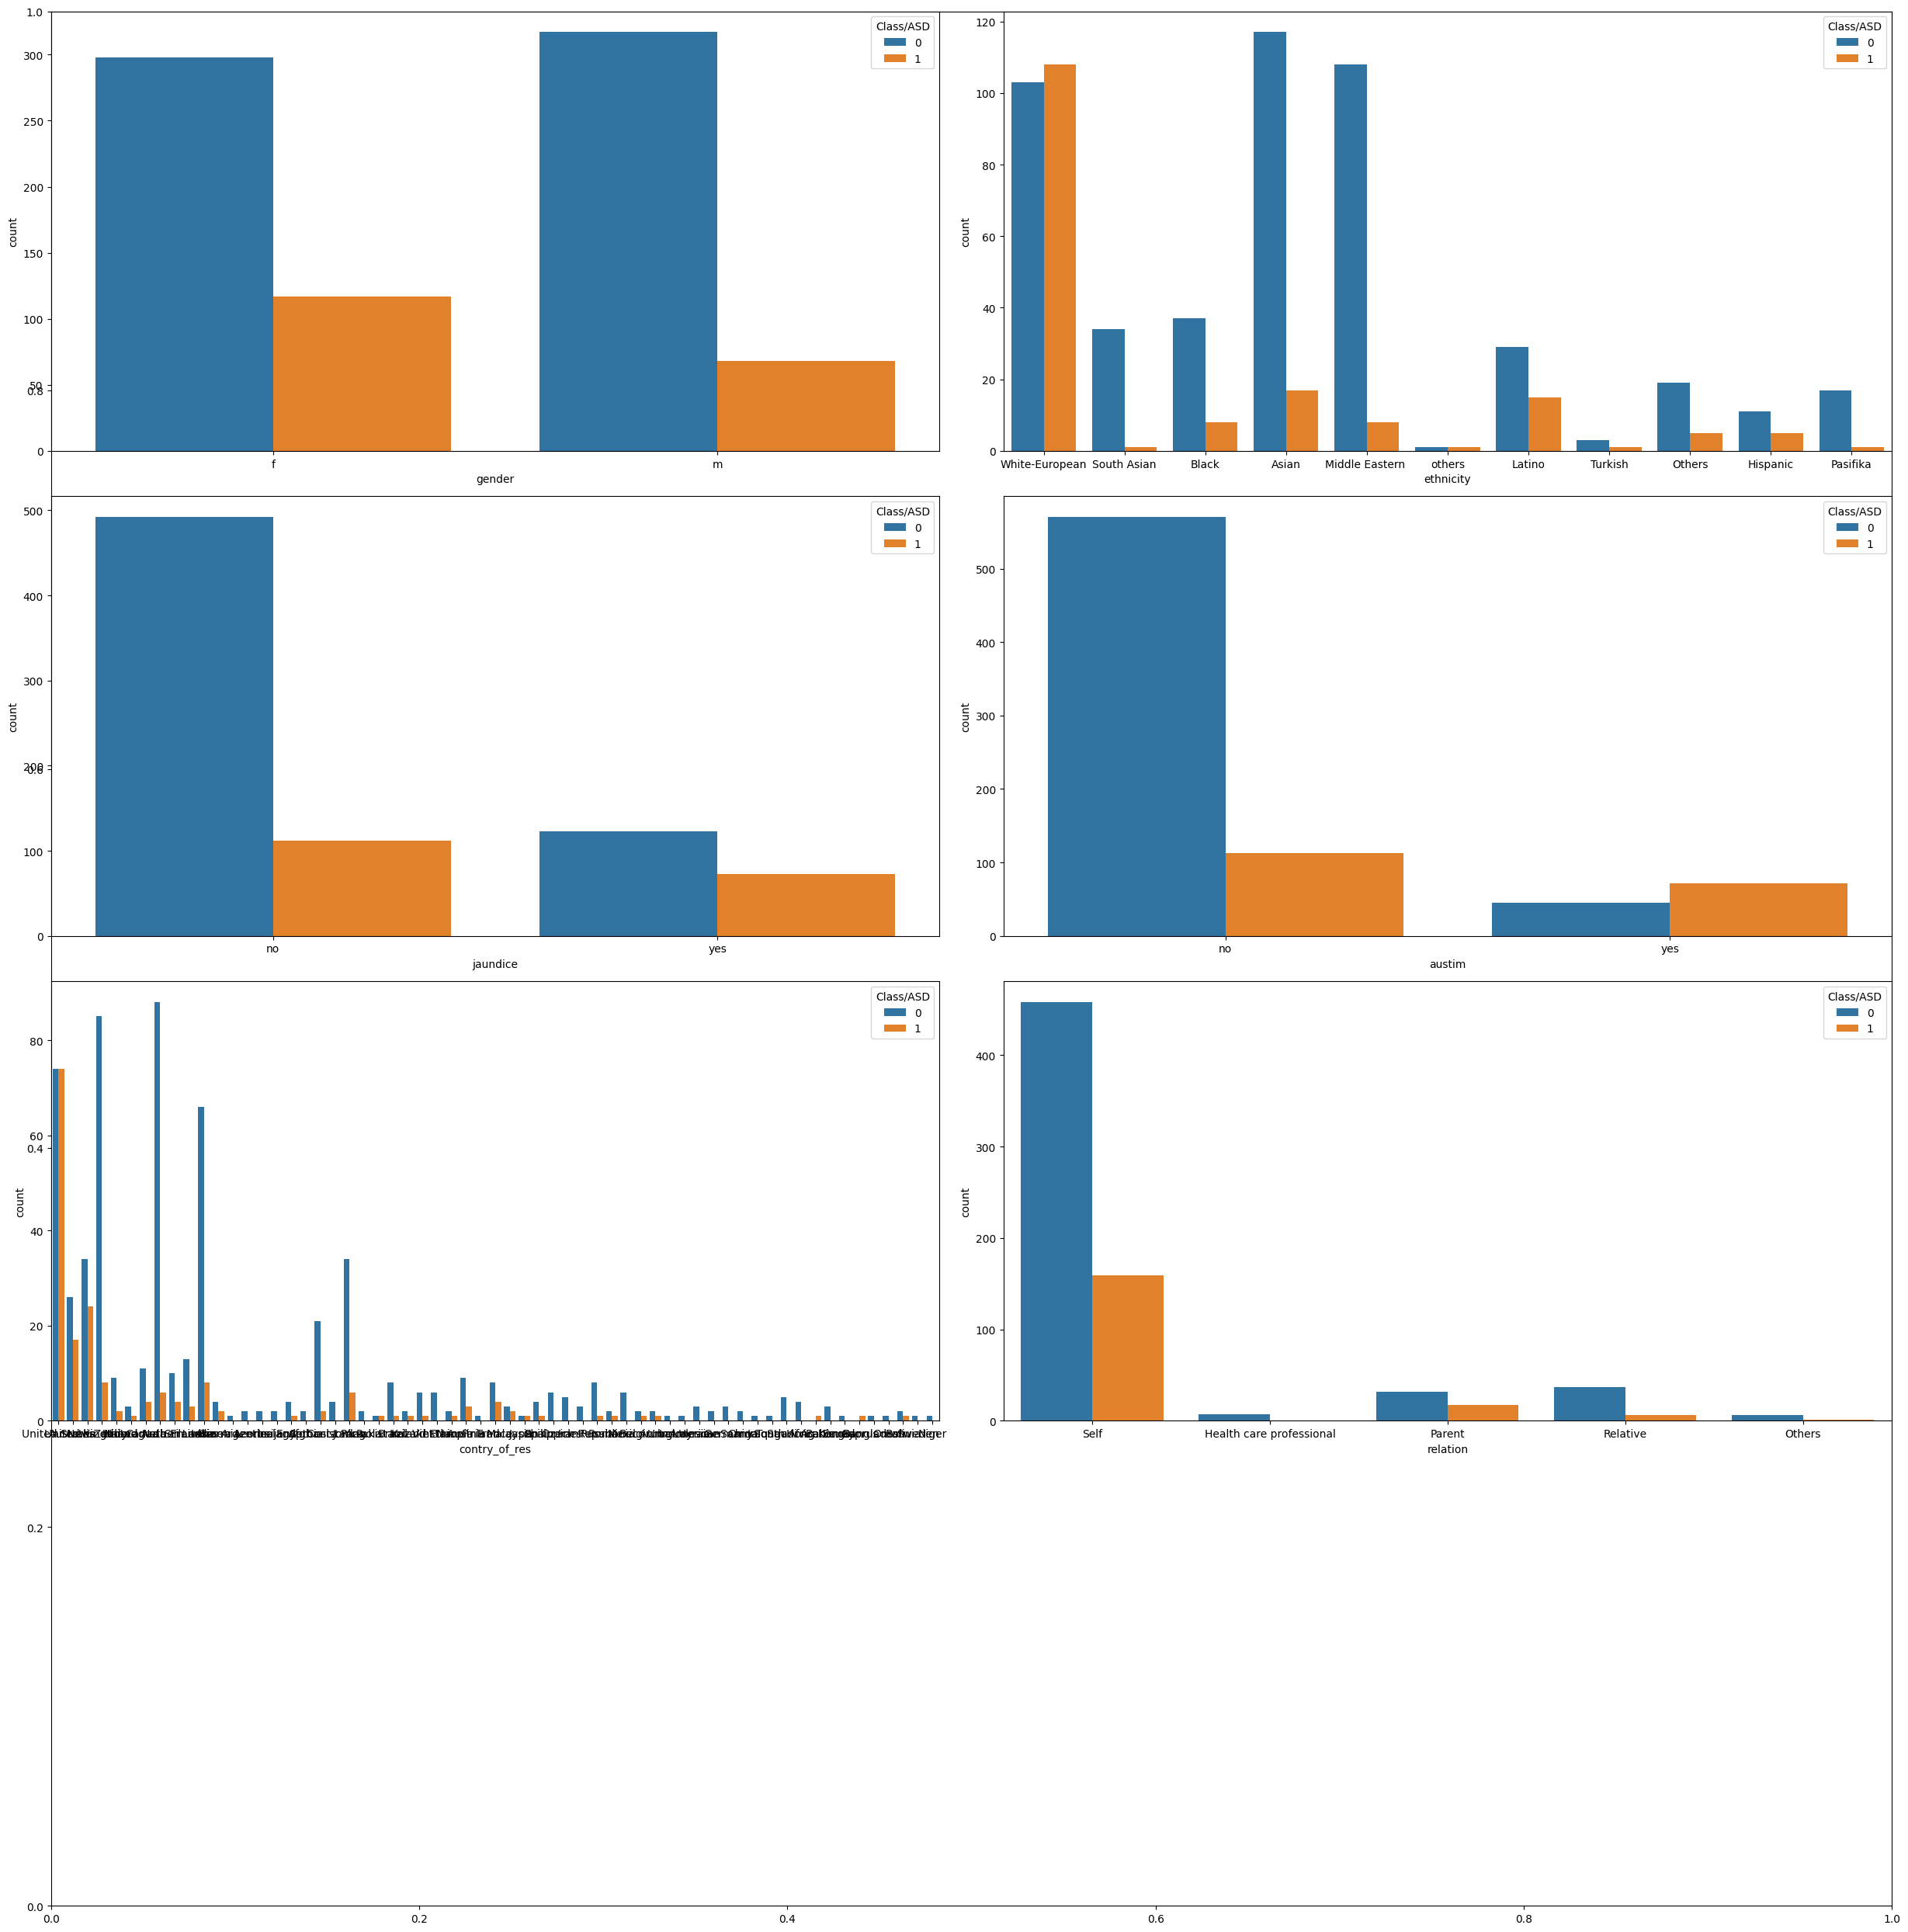

In [16]:
plt.subplots(figsize=(25,25))
for i,j in enumerate(cat_col):
    plt.subplot(4,2,i+1)
    sns.countplot(x=train[j],hue=train["Class/ASD"])
plt.tight_layout()



#In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. 
#This implies that the geography of a person also gives an idea of having autism.

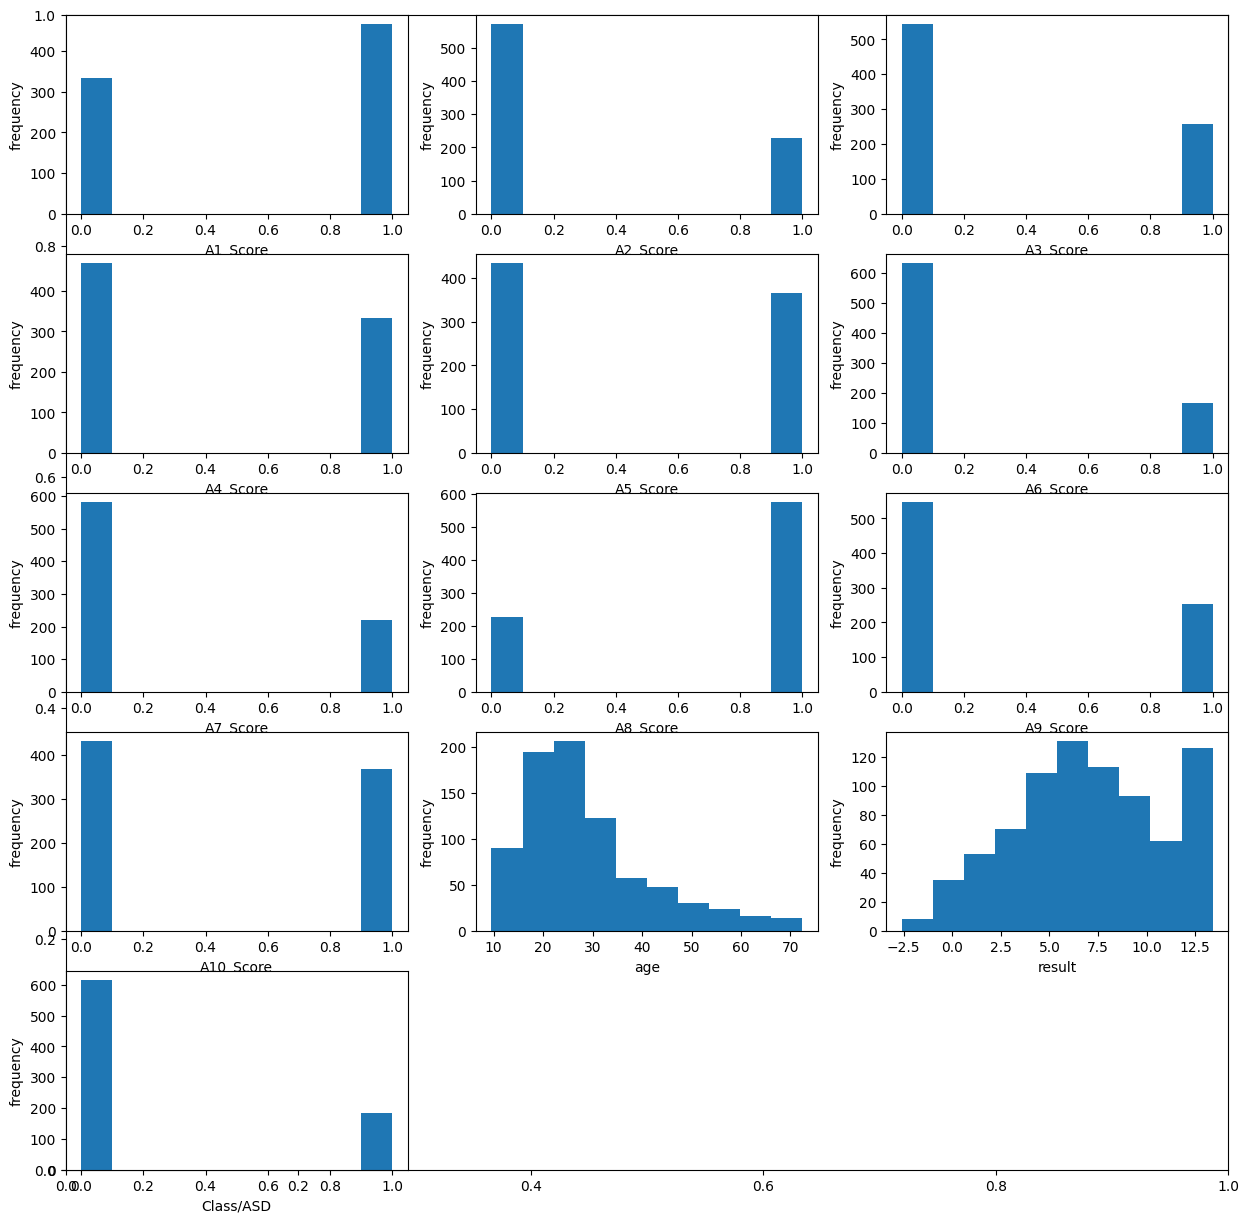

In [17]:
plt.subplots(figsize=(15,15))
for i,j in enumerate(num_col):
    plt.subplot(5,3,i+1)
    plt.hist(x=train[j])
    plt.xlabel(j)
    plt.ylabel("frequency")

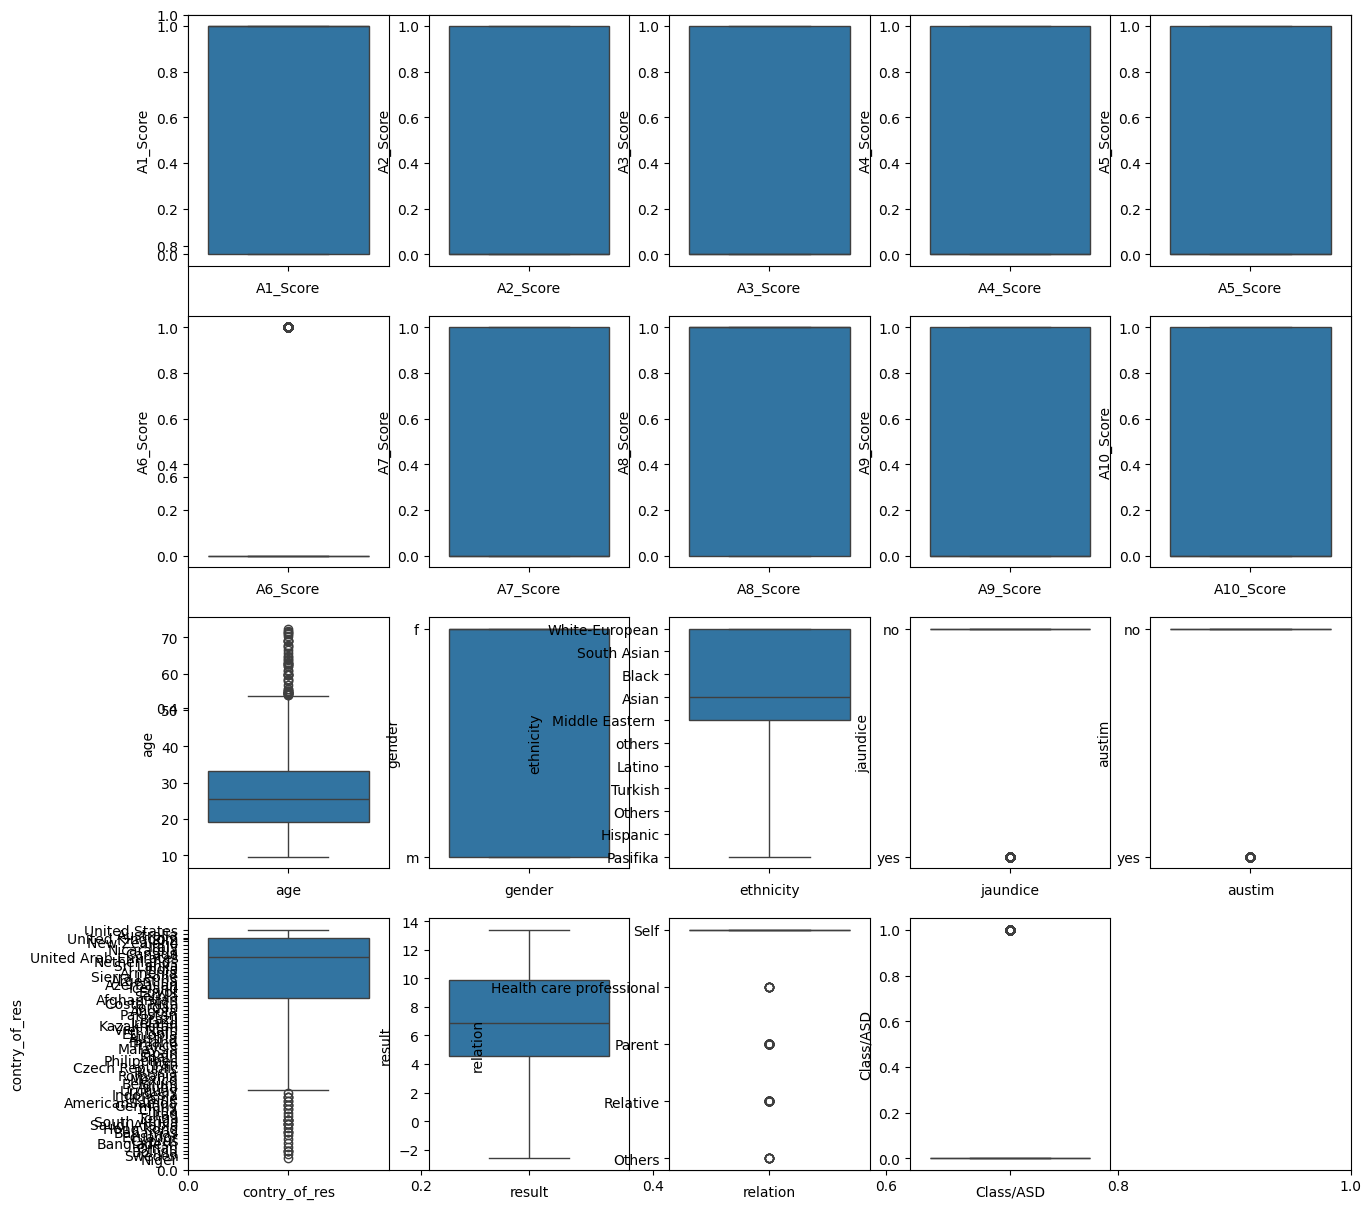

In [18]:
plt.subplots(figsize=(15,15))
for i,j in enumerate(train.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(train[j])
    plt.xlabel(j)

<Axes: xlabel='age', ylabel='Count'>

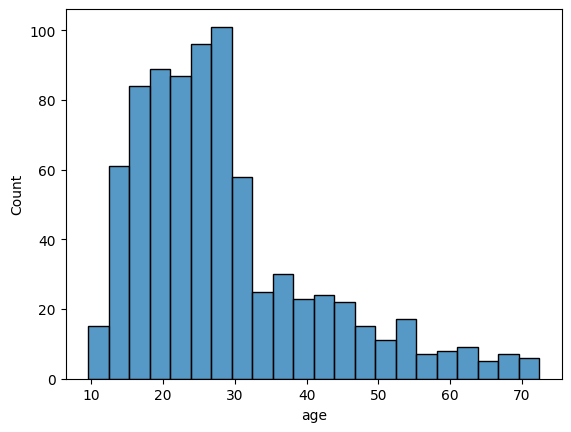

In [19]:
sns.histplot(train["age"])
#as we can see from the boyx plot and this plot the age column has righ skewness and outliers

In [20]:
#Applying log transformations to remove the skewness of the data

train["age"]=train["age"].apply(lambda x: np.log(x))
test["age"]=test["age"].apply(lambda x: np.log(x))

ethnicity
White-European     211
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


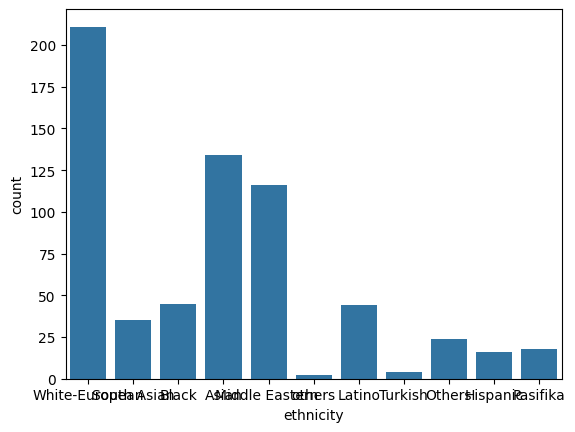

In [21]:
print(train["ethnicity"].value_counts())
print(sns.countplot(x=train["ethnicity"]))

relation
Self                        617
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


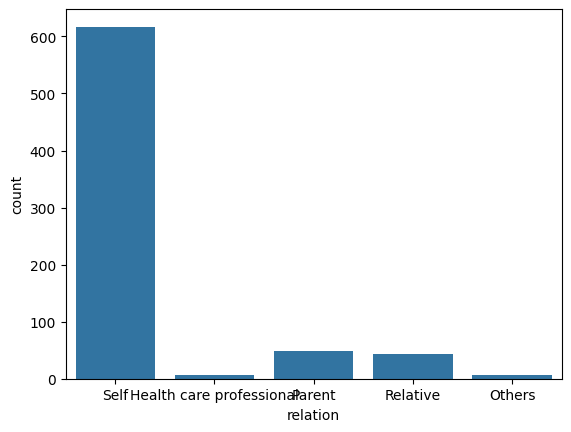

In [22]:
print(train["relation"].value_counts())
print(sns.countplot(x=train["relation"]))

In [23]:
train["ethnicity"]=train["ethnicity"].fillna(train["ethnicity"].mode()[0])
test["ethnicity"]=test["ethnicity"].fillna(test["ethnicity"].mode()[0])

In [24]:
train["relation"]=train["relation"].fillna(train["relation"].mode()[0])
test["relation"]=test["relation"].fillna(test["relation"].mode()[0])

In [25]:
for i in cat_col:
    uni=train[i].unique()
    if len(uni)==2:
        print(i)

gender
jaundice
austim


In [26]:
for i in ["jaundice","austim"]:
    train[i]=train[i].map({"yes":1,"no":0})
    test[i]=test[i].map({"yes":1,"no":0})
    
    
    
train["gender"]=train["gender"].map({"f":1,"m":0})
test["gender"]=test["gender"].map({"f":1,"m":0})    


In [27]:
for i in cat_col:
    uni=train[i].unique()
    if len(uni)>2:
        print(i)

ethnicity
contry_of_res
relation


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


for i in ["ethnicity","contry_of_res","relation"]:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])
    


<Axes: xlabel='Class/ASD', ylabel='count'>

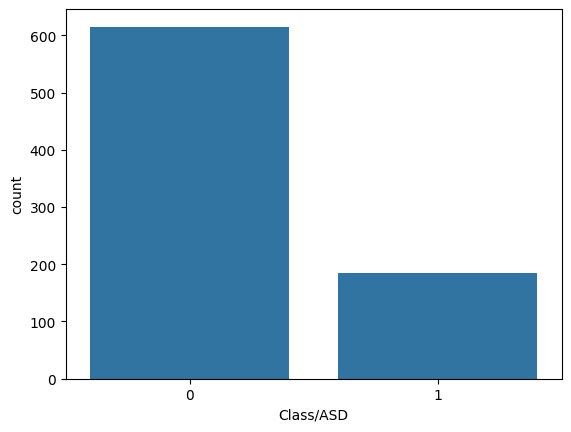

In [29]:
sns.countplot(x=train["Class/ASD"])

In [30]:
#balancing the target column

from imblearn.over_sampling import SMOTE
smote=SMOTE()

x=train.drop("Class/ASD",axis=1)
y=train["Class/ASD"]

x,y=smote.fit_resample(x,y)

print(y.value_counts())

Class/ASD
0    615
1    615
Name: count, dtype: int64


In [31]:
train.corr()["Class/ASD"].sort_values(ascending=False)

Class/ASD        1.000000
A3_Score         0.549618
A6_Score         0.542588
A9_Score         0.538688
A4_Score         0.512792
result           0.496165
A5_Score         0.448473
A10_Score        0.439587
A7_Score         0.394660
A2_Score         0.380703
austim           0.377079
A1_Score         0.289991
A8_Score         0.219034
jaundice         0.190769
ethnicity        0.188173
age              0.131178
gender           0.124789
contry_of_res    0.110710
relation         0.004093
Name: Class/ASD, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((984, 18), (246, 18), (984,), (246,))

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


In [34]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix

models={"logistic regression":LogisticRegression(),
        "decision tree":DecisionTreeClassifier(),
        "Random forest":RandomForestClassifier(),
        "XGBOOST":XGBClassifier(),
       "SVC":SVC()}

results=[]
for i in models:
    models[i].fit(x_train,y_train)
    y_pred=models[i].predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    roc_auc=roc_auc_score(y_pred,y_test)
    results.append({'Model': i,'Accuracy': accuracy,'F1 Score': f1,'ROC AUC': roc_auc})
    
table=pd.DataFrame(results) 
print(table.sort_values(by="Accuracy",ascending=False))

                 Model  Accuracy  F1 Score   ROC AUC
2        Random forest  0.853659  0.856000  0.855504
3              XGBOOST  0.845528  0.841667  0.845437
4                  SVC  0.817073  0.816327  0.817355
0  logistic regression  0.780488  0.782258  0.781449
1        decision tree  0.756098  0.750000  0.755952


In [35]:
RF=RandomForestClassifier()
x.train=train.drop("Class/ASD",axis=1)
y.train=train["Class/ASD"]
RF.fit(x.train,y.train)
prediction=RF.predict(test)
prediction

C:\Users\Hanieh\AppData\Local\Temp\ipykernel_12820\2023351961.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.train=train.drop("Class/ASD",axis=1)


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [36]:
answer=pd.DataFrame({"ID":ID,"Class/ASD":prediction})
answer

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
195,196,0
196,197,0
197,198,0
198,199,1


In [37]:
answer["Class/ASD"].value_counts()

Class/ASD
0    166
1     34
Name: count, dtype: int64

In [38]:
answer.to_csv("C:/Users/Hanieh/Desktop/answer.csv",index=False)